In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

In [2]:
db = mysql.connector.connect(host="localhost",
                             username="root",
                             password="Lipi@1234",
                             database="ecommerce")
cur=db.cursor()

# List all unique cities whre customers are located

In [4]:
query ="""select distinct(customer_city) from customers"""
cur.execute(query)
data=cur.fetchall()
data


[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [8]:
query="""select count(order_id) 
from orders
where order_purchase_timestamp = 2017"""
cur.execute(query)
data=cur.fetchall()
"Total orders placed in 2017 are",data[0][0]

('Total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [25]:
query="""select upper(products.product_category) catagory,
round(sum(payments.payment_value),2)
from products join order_items
on products.product_id = order_items.product_id
join  payments
on payments.order_id = order_items.order_id
group by catagory """
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=['Category','sales'])
df

,Category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# Calculate the percentage of orders that were paid in installments.

In [24]:
query= """select sum(case 
                          when payment_installments >= 1 then 1 else 0
                     end)/count(*)*100
                     from payments"""
cur.execute(query)
data=cur.fetchall()
"The percentage of orders that were paid in installments is",data[0]
#df=pd.DataFrame(data,columns=['Category','sales'])
#df

('The percentage of orders that were paid in installments is',
 (Decimal('99.9981'),))

# Count the number of customers from each state. 

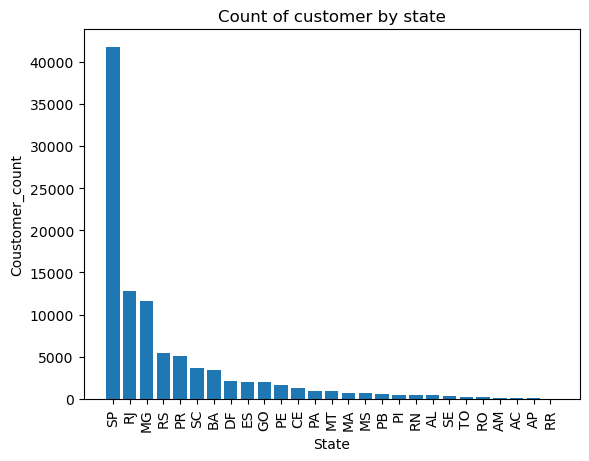

In [17]:
query= """select customer_state,count(customer_id) from customers
group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['State','Customer_count'])
df=df.sort_values(by="Customer_count",ascending=False)
#df
plt.figure(figure=(8,3))
plt.bar(df["State"],df["Customer_count"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Coustomer_count")
plt.title("Count of customer by state")
plt.show()

# Calculate the number of orders per month in 2018.

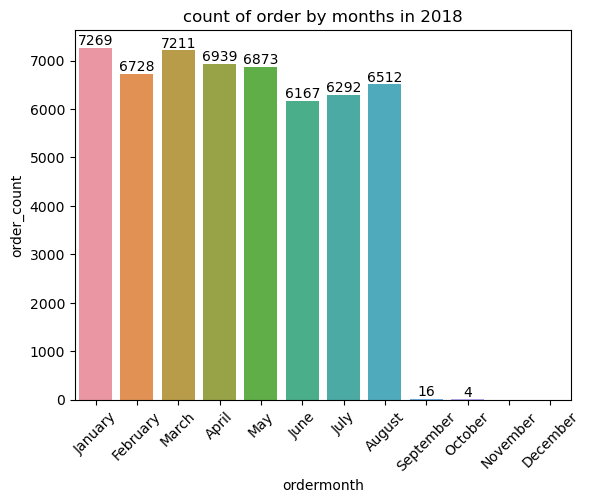

In [5]:
query= """select monthname(order_purchase_timestamp) ordermonth,count(order_id) order_count
from orders 
where year(order_purchase_timestamp) =2018 
group by ordermonth"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["ordermonth","order_count"])
o=["January","February","March","April","May","June","July","August","September","October","November","December"]
#df
ax=sns.barplot(x=df["ordermonth"],y=df["order_count"],data=df,order=o)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title("count of order by months in 2018")
plt.show()

# Find the average number of products per order, grouped by customer city.

In [25]:
query= """with count_per_order as(select orders.order_id,orders.customer_id,count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id,orders.customer_id)

select customers.customer_city City,round(avg(count_per_order.oc),2) avg_count
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by avg_count desc;

"""
cur.execute(query)
data=cur.fetchall()
data
df=pd.DataFrame(data,columns=["City","avg_count"])
df.head(10)
                

,City,avg_count
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Calculate the percentage of total revenue contributed by each product category.

In [30]:
query="""select upper(products.product_category) catagory,
round((sum(payments.payment_value)/(select sum(payment_value)  from payments))*100,2) sales
from products join order_items
on products.product_id = order_items.product_id
join  payments
on payments.order_id = order_items.order_id
group by catagory 
order by sales desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","percentage_distribution"])
df

,Category,percentage_distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price and the number of times a product has been purchased.

In [24]:
query="""select products.product_category ,
round(avg(order_items.price),2),count(order_items.product_id) order_count
from order_items join products
on order_items.product_id = products.product_id
group by products.product_category""" 
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category","order_count","price"])
df
arr1=df["order_count"]
arr2=df["price"]
a=np.corrcoef([arr1,arr2])
print("the correlation is",a[0][-1])

the correlation is -0.10631514167157562


# Calculate the total revenue generated by each seller, and rank them by revenue.

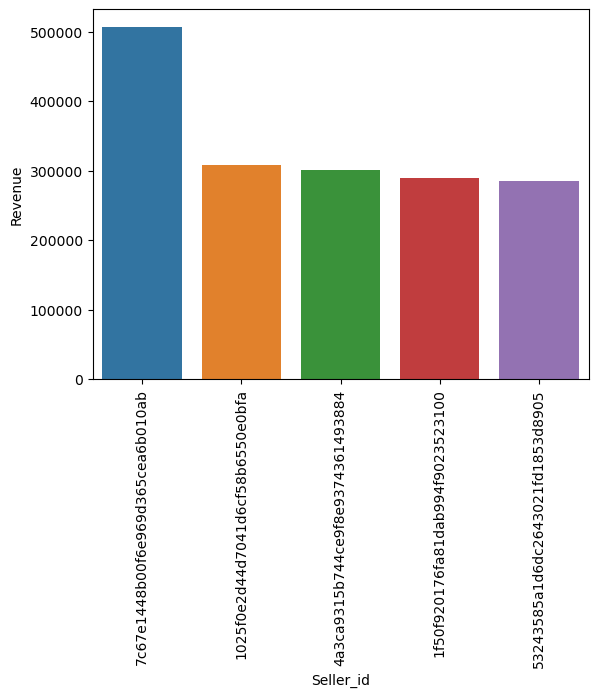

In [10]:
query="""select * ,dense_rank() over(order by revenue desc) rn from
(select order_items.seller_id,sum(payments.payment_value) revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Seller_id","Revenue","Rank"])
df=df.head()
sns.barplot(x = "Seller_id", y = "Revenue",data=df)
plt.xticks(rotation=90)
plt.show()
-#df

#data

# Calculate the moving average of order values for each customer over their order history

In [5]:
query="""select customer_id,order_purchase_timestamp,payment,
avg(payment) over (partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customer_id","timestamp","payment","avg_pay"])
df



,customer_id,timestamp,payment,avg_pay
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


#  Calculate the cumulative sales per month for each year

In [17]:
query ="""select years,months,payment,sum(payment)
over(order by years,months) cumulative_sales
from
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id= payments.order_id
group by years,months order by years,months) as a"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years","months","payment","cumulative_sales"])
df


,years,months,payment,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


# Calculate the year-over-year growth rate of total sales.

In [27]:
query="""with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment
from orders join payments
on orders.order_id= payments.order_id
group by years order by years)

select years,((payment-lag(payment,1) over(order by years))/ 
lag(payment,1) over(order by years)) *100 from a"""


cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data,columns=["year","you % growth"])
df
#data

,year,you % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [16]:
query="""with a as(select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id=orders.customer_id
group by customers.customer_id),

b as(select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on a.customer_id=orders.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp <
date_add(first_order,interval 6 month)
group by a.customer_id )

select 100 * (count(distinct a.customer_id)/ count( distinct b.customer_id))
from a left join b
on a.customer_id= b.customer_id
;"""

cur.execute(query)
data=cur.fetchall()
data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

In [29]:
query="""
select years,customer_id,payment,d_rank
from
(select orders.customer_id,year(orders.order_purchase_timestamp) years,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3;"""

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data,columns=["years","Id","payment","rank"])
#sns.barplot(x = df["Id"],y = df["payment"], data = df,hue = "payment")
#plt.xstick(rotation=90)
#plt.show()
df

,years,Id,payment,rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.550049,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.739990,2
2,2016,4a06381959b6670756de02e07b83815f,1227.780029,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.080078,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.310059,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.660156,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.879883,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.209961,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.439941,3
